In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
import numpy as np
import scipy as scipy
from scipy import stats

Loading Datasets

In [15]:
transaction = pd.read_excel("data/QVI_transaction_data.xlsx")
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
customer = pd.read_csv("data/QVI_purchase_behaviour.csv")
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


Understanding Datasets

In [27]:
transaction.info()
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   YEAR            264836 non-null  int64         
 9   MONTH           264836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 20.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------      

Converting data types



In [17]:
date_offsets = transaction["DATE"]
base_date = pd.Timestamp('1901-01-01')  # check this!
transaction["DATE"] = [
    base_date + pd.DateOffset(date_offset) 
    for date_offset in date_offsets
]



In [24]:
transaction["YEAR"]= transaction["DATE"].dt.year
transaction["MONTH"]=transaction["DATE"].dt.month

In [46]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2020,5
2,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2020,5
3,2019-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2019,8
4,2019-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2019,8
...,...,...,...,...,...,...,...,...,...,...
264831,2020-03-10,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2020,3
264832,2019-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2019,8
264833,2019-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2019,11
264834,2019-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2019,12


In [179]:
cus172032=transaction[transaction["LYLTY_CARD_NBR"]==172032]
cus172032["TOT_SALES"].sum()

120.09999999999998

In [51]:
customer[customer["LYLTY_CARD_NBR"]==172032]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
45905,172032,YOUNG SINGLES/COUPLES,Mainstream


In [47]:
transaction["LYLTY_CARD_NBR"].value_counts()

172032    18
162039    18
230078    17
128178    17
13138     17
          ..
22190      1
22138      1
22099      1
22089      1
272380     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

Checking for missing Values

In [29]:
transaction.isna()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
264831,False,False,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False,False,False
264833,False,False,False,False,False,False,False,False,False,False
264834,False,False,False,False,False,False,False,False,False,False


In [41]:
transaction["TOT_SALES"].isna().value_counts()

False    264836
Name: TOT_SALES, dtype: int64

No missing values in the transaction dataframe


In [30]:
customer.isna()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72632,False,False,False
72633,False,False,False
72634,False,False,False
72635,False,False,False


In [44]:
customer["PREMIUM_CUSTOMER"].isna().value_counts()

False    72637
Name: PREMIUM_CUSTOMER, dtype: int64

No missing values in the customer data

COMBINING THE TRANSACTION AND CUSTOMER DATASET

In [57]:
merge_tc = pd.merge(transaction, customer, on="LYLTY_CARD_NBR")

In [64]:
merger_ct = pd.merge(customer, transaction, on="LYLTY_CARD_NBR")
merger_ct

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10
264834,2370961,OLDER FAMILIES,Budget,2019-10-29,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,2019,10


Confirming the values tally

In [68]:
merger_ct["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [65]:
transaction["LYLTY_CARD_NBR"].value_counts()

172032    18
162039    18
230078    17
128178    17
13138     17
          ..
22190      1
22138      1
22099      1
22089      1
272380     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [67]:
merge_tc["LYLTY_CARD_NBR"].value_counts()

172032    18
162039    18
230078    17
128178    17
13138     17
          ..
22190      1
22138      1
22099      1
22089      1
272380     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [63]:
merger_ct["LYLTY_CARD_NBR"].value_counts()

162039     18
172032     18
13138      17
116181     17
128178     17
           ..
143033      1
143029      1
143027      1
143026      1
2373711     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

Removing Products with the name Salsa

In [73]:
discard = ["Salsa"]

In [ ]:
df[~df.Subject.str.contains('|'.join(discard))]

New Dataset of chips only products

In [119]:
chip_tc = merger_ct[~merger_ct.PROD_NAME.str.contains('|'.join(discard))]
chip_tc.to_csv("data/chips_data.csv")

In [122]:
chip_tc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10


In [123]:
chip_tc["price"]=chip_tc["TOT_SALES"]/chip_tc["PROD_QTY"]
chip_tc

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3726845015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chip_tc["price"]=chip_tc["TOT_SALES"]/chip_tc["PROD_QTY"]


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9,2.7
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3,3.6
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8,6.5
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10,4.6
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10,4.2


Getting outliers


In [202]:
chip_tc.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].agg(["min","mean","max"])

,min,mean,max
PREMIUM_CUSTOMER,,,
Budget,1,1.910675,5
Mainstream,1,1.902086,5
Premium,1,1.913316,200


In [204]:
chip_tc.groupby("LIFESTAGE").agg({"PROD_QTY":["min","mean","max"], "TOT_SALES":["min","mean","max"]})

PROD_QTY                TOT_SALES                 
                            min      mean  max       min      mean    max
LIFESTAGE                                                                
MIDAGE SINGLES/COUPLES        1  1.901701    5       1.7  7.373442   29.5
NEW FAMILIES                  1  1.857781    5       1.7  7.287664   27.0
OLDER FAMILIES                1  1.955182  200       1.7  7.303364  650.0
OLDER SINGLES/COUPLES         1  1.913354    5       1.7  7.402982   29.5
RETIREES                      1  1.892593    5       1.7  7.373994   29.5
YOUNG FAMILIES                1  1.940460    5       1.7  7.275841   29.5
YOUNG SINGLES/COUPLES         1  1.834025    5       1.7  7.175854   27.0

In [181]:
chip_tc["PROD_QTY"].max()

200

Dataset without Outliers

In [206]:
new_chip_tc = chip_tc[chip_tc["PROD_QTY"]!=200]

In [207]:
new_chip_tc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9,2.7
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3,3.6
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8,6.5
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10,4.6
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10,4.2


Transaction by Date

In [224]:
new_chip_tc["DATE"].value_counts()

2019-12-26    865
2019-12-25    853
2019-12-24    840
2019-12-21    839
2019-12-22    808
             ... 
2020-06-25    612
2019-10-20    611
2019-11-27    610
2019-09-24    609
2020-06-14    607
Name: DATE, Length: 364, dtype: int64

In [237]:
new_chip_tc[new_chip_tc["MONTH"]==12]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2019-12-30,1,6,86,Cheetos Puffs 165g,1,2.8,2019,12,2.8
6,1007,YOUNG SINGLES/COUPLES,Budget,2019-12-06,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2019,12,3.8
7,1007,YOUNG SINGLES/COUPLES,Budget,2019-12-07,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,2019,12,2.7
13,1011,OLDER SINGLES/COUPLES,Mainstream,2019-12-03,1,14,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2019,12,3.8
14,1011,OLDER SINGLES/COUPLES,Mainstream,2019-12-21,1,15,1,Smiths Crinkle Cut Chips Barbecue 170g,1,2.9,2019,12,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264814,2330251,RETIREES,Budget,2019-12-01,77,236747,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,2019,12,5.9
264828,2370581,OLDER SINGLES/COUPLES,Budget,2019-12-19,88,240317,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,2019,12,3.9
264829,2370581,OLDER SINGLES/COUPLES,Budget,2019-12-28,88,240318,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,2019,12,4.6
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6


In [241]:
dec["DAY"]=dec["DATE"].dt.day

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\2890025519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec["DAY"]=dec["DATE"].dt.day


In [242]:
dec

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price,DAY
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2019-12-30,1,6,86,Cheetos Puffs 165g,1,2.8,2019,12,2.8,30
6,1007,YOUNG SINGLES/COUPLES,Budget,2019-12-06,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2019,12,3.8,6
7,1007,YOUNG SINGLES/COUPLES,Budget,2019-12-07,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,2019,12,2.7,7
13,1011,OLDER SINGLES/COUPLES,Mainstream,2019-12-03,1,14,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2019,12,3.8,3
14,1011,OLDER SINGLES/COUPLES,Mainstream,2019-12-21,1,15,1,Smiths Crinkle Cut Chips Barbecue 170g,1,2.9,2019,12,2.9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264814,2330251,RETIREES,Budget,2019-12-01,77,236747,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,2019,12,5.9,1
264828,2370581,OLDER SINGLES/COUPLES,Budget,2019-12-19,88,240317,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,2019,12,3.9,19
264829,2370581,OLDER SINGLES/COUPLES,Budget,2019-12-28,88,240318,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,2019,12,4.6,28
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6,10


<AxesSubplot:xlabel='DAY'>

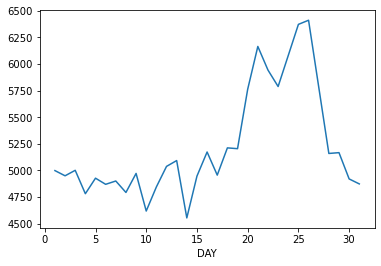

In [244]:
dec.groupby("DAY")["TOT_SALES"].sum().plot()

<AxesSubplot:xlabel='MONTH'>

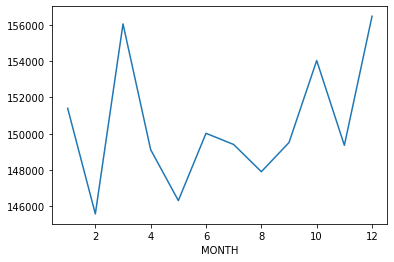

In [243]:
new_chip_tc.groupby("MONTH")["TOT_SALES"].sum().plot()

Separating Values from Product Name

In [ ]:
df['product_numbers'] = df['product'].str.extract('(\d+)')

In [245]:
new_chip_tc["SIZE(g)"]= new_chip_tc["PROD_NAME"].str.extract("(\d+)")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\2322741168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chip_tc["SIZE(g)"]= new_chip_tc["PROD_NAME"].str.extract("(\d+)")


In [246]:
new_chip_tc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price,SIZE(g)
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10,3.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9,2.7,150
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3,3.6,210
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8,6.5,380
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6,210
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10,4.6,150
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10,4.2,165


In [250]:
new_chip_tc["SIZE(g)"]=new_chip_tc["SIZE(g)"].astype("float")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\636843125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chip_tc["SIZE(g)"]=new_chip_tc["SIZE(g)"].astype("float")


In [251]:
new_chip_tc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246740 non-null  int64         
 1   LIFESTAGE         246740 non-null  object        
 2   PREMIUM_CUSTOMER  246740 non-null  object        
 3   DATE              246740 non-null  datetime64[ns]
 4   STORE_NBR         246740 non-null  int64         
 5   TXN_ID            246740 non-null  int64         
 6   PROD_NBR          246740 non-null  int64         
 7   PROD_NAME         246740 non-null  object        
 8   PROD_QTY          246740 non-null  int64         
 9   TOT_SALES         246740 non-null  float64       
 10  YEAR              246740 non-null  int64         
 11  MONTH             246740 non-null  int64         
 12  price             246740 non-null  float64       
 13  SIZE(g)           246740 non-null  float64       
dtypes: d

In [254]:
new_chip_tc["SIZE(g)"].max()

380.0

In [255]:
new_chip_tc["SIZE(g)"].min()

70.0

Histogram of the size of chips

<AxesSubplot:ylabel='Frequency'>

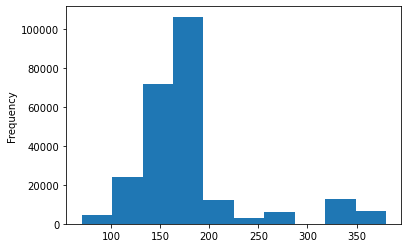

In [257]:
new_chip_tc["SIZE(g)"].plot.hist()

Getting Brand Names 

In [261]:
new_chip_tc["BRAND"]="null"

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3634344167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chip_tc["BRAND"]="null"


In [267]:
new_chip_tc["BRAND"]=new_chip_tc.PROD_NAME.str.split().str.get(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\2753356890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chip_tc["BRAND"]=new_chip_tc.PROD_NAME.str.split().str.get(0)


In [268]:
new_chip_tc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price,SIZE(g),BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10,3.0,175.0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9,2.7,150.0,Red
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3,3.6,210.0,Grain
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3,3.0,175.0,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11,1.9,160.0,WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8,6.5,380.0,Dorito
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6,210.0,Grain
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10,4.6,150.0,Kettle
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10,4.2,165.0,Tyrrells


In [277]:
new_chip_tc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price,SIZE(g),BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10,3.0,175.0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9,2.7,150.0,Red
2,1003,YOUNG FAMILIES,Budget,2020-03-08,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2020,3,3.6,210.0,Grain
3,1003,YOUNG FAMILIES,Budget,2020-03-09,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2020,3,3.0,175.0,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,1,5,96,WW Original Stacked Chips 160g,1,1.9,2019,11,1.9,160.0,WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8,6.5,380.0,Dorito
264831,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2019,12,3.6,210.0,Grain
264832,2370751,YOUNG FAMILIES,Premium,2019-10-03,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2019,10,4.6,150.0,Kettle
264833,2370961,OLDER FAMILIES,Budget,2019-10-26,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2019,10,4.2,165.0,Tyrrells


In [276]:
new_chip_tc["BRAND"].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Red           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

Replacing RRD to Red


In [273]:
new_chip_tc["BRAND"].replace("RRD","Red", inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\1983154870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_chip_tc["BRAND"].replace("RRD","Red", inplace=True)


Sales and Plot By Lifestage

In [209]:
new_chip_tc.groupby("LIFESTAGE")["TOT_SALES"].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
OLDER FAMILIES            328519.90
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
Name: TOT_SALES, dtype: float64

<AxesSubplot:xlabel='TOT_SALES', ylabel='LIFESTAGE'>

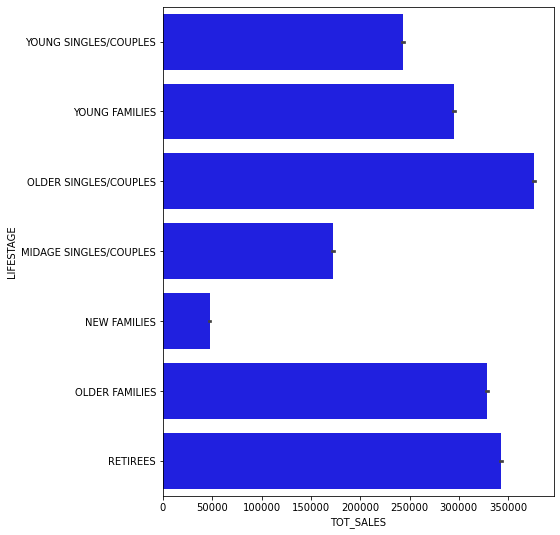

In [210]:
plt.figure(figsize=(7,9))
sns.barplot(data=new_chip_tc, y="LIFESTAGE", x="TOT_SALES", estimator=sum, color="blue")

<AxesSubplot:xlabel='LIFESTAGE'>

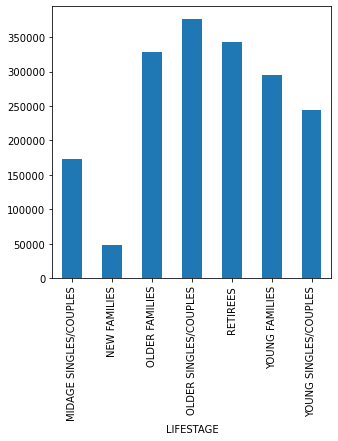

In [211]:
plt.figure(figsize=(5,5))
new_chip_tc.groupby("LIFESTAGE")["TOT_SALES"].sum().plot.bar()

SUM AND COUNT SEGMENT FOR PREMIUM AND LIFESTYLE SEGMENT SEPARATELY


In [279]:
new_chip_tc.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum()

PREMIUM_CUSTOMER
Budget        631406.85
Mainstream    700865.40
Premium       472905.45
Name: TOT_SALES, dtype: float64

<AxesSubplot:ylabel='TOT_SALES'>

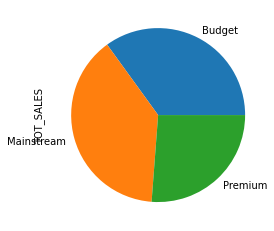

In [278]:
new_chip_tc.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().plot(kind="pie")

In [92]:
new_chip_tc.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
OLDER FAMILIES            45160
OLDER SINGLES/COUPLES     50793
RETIREES                  46431
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
Name: LYLTY_CARD_NBR, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\1795137816.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_chip_tc.groupby(["LIFESTAGE"])["PREMIUM_CUSTOMER","TOT_SALES"].sum().plot(kind="bar")


<AxesSubplot:xlabel='LIFESTAGE'>

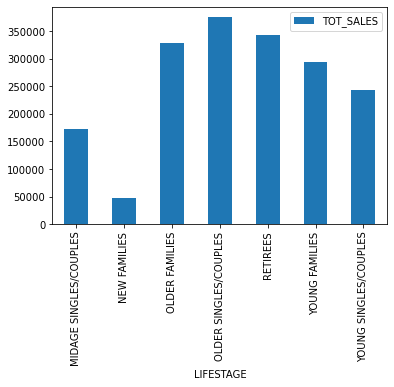

In [212]:
new_chip_tc.groupby(["LIFESTAGE"])["PREMIUM_CUSTOMER","TOT_SALES"].sum().plot(kind="bar")

SUM PREMIUM CUSTOMER SEPARATED BY LIFESTYLE

In [280]:
new_chip_tc.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["TOT_SALES"].sum()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES     33345.70
                  NEW FAMILIES               20607.45
                  OLDER FAMILIES            156863.75
                  OLDER SINGLES/COUPLES     127833.60
                  RETIREES                  105916.30
                  YOUNG FAMILIES            129717.95
                  YOUNG SINGLES/COUPLES      57122.10
Mainstream        MIDAGE SINGLES/COUPLES     84734.25
                  NEW FAMILIES               15979.70
                  OLDER FAMILIES             96413.55
                  OLDER SINGLES/COUPLES     124648.50
                  RETIREES                  145168.95
                  YOUNG FAMILIES             86338.25
                  YOUNG SINGLES/COUPLES     147582.20
Premium           MIDAGE SINGLES/COUPLES     54443.85
                  NEW FAMILIES               10760.80
                  OLDER FAMILIES             75242.60
                  OLDER SINGLES/COUPLES  

<AxesSubplot:xlabel='TOT_SALES', ylabel='LIFESTAGE'>

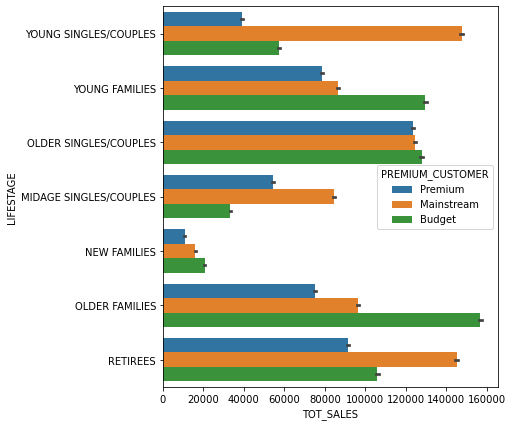

In [213]:
plt.figure(figsize=(6,7))
sns.barplot(data=new_chip_tc, y="LIFESTAGE", x="TOT_SALES", hue="PREMIUM_CUSTOMER", estimator= sum)

COUNT OF PREMIUM CUSTOMER SEPARETED BY LIFESTYLE

In [289]:
new_chip_tc.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["TOT_SALES"].count()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES     4691
                  NEW FAMILIES               2824
                  OLDER FAMILIES            21514
                  OLDER SINGLES/COUPLES     17172
                  RETIREES                  14225
                  YOUNG FAMILIES            17763
                  YOUNG SINGLES/COUPLES      8573
Mainstream        MIDAGE SINGLES/COUPLES    11095
                  NEW FAMILIES               2185
                  OLDER FAMILIES            13241
                  OLDER SINGLES/COUPLES     17061
                  RETIREES                  19970
                  YOUNG FAMILIES            11947
                  YOUNG SINGLES/COUPLES     19544
Premium           MIDAGE SINGLES/COUPLES     7612
                  NEW FAMILIES               1488
                  OLDER FAMILIES            10403
                  OLDER SINGLES/COUPLES     16560
                  RETIREES                  12236
         

<AxesSubplot:xlabel='PREMIUM_CUSTOMER,LIFESTAGE'>

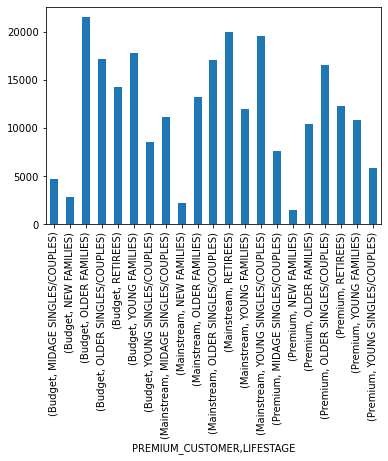

In [288]:
new_chip_tc.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["TOT_SALES"].count().plot.bar()

<AxesSubplot:xlabel='TOT_SALES', ylabel='LIFESTAGE'>

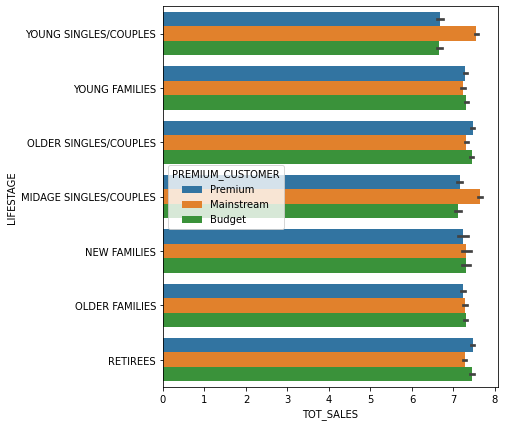

In [287]:
plt.figure(figsize=(6,7))
sns.barplot(data=new_chip_tc, y="LIFESTAGE", x="TOT_SALES", hue="PREMIUM_CUSTOMER")

In [293]:
new_chip_tc.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["PROD_QTY"].mean()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    1.893626
                  NEW FAMILIES              1.855878
                  OLDER FAMILIES            1.945384
                  OLDER SINGLES/COUPLES     1.914920
                  RETIREES                  1.893286
                  YOUNG FAMILIES            1.941226
                  YOUNG SINGLES/COUPLES     1.808002
Mainstream        MIDAGE SINGLES/COUPLES    1.911942
                  NEW FAMILIES              1.858124
                  OLDER FAMILIES            1.948795
                  OLDER SINGLES/COUPLES     1.911201
                  RETIREES                  1.886680
                  YOUNG FAMILIES            1.941408
                  YOUNG SINGLES/COUPLES     1.853510
Premium           MIDAGE SINGLES/COUPLES    1.891750
                  NEW FAMILIES              1.860887
                  OLDER FAMILIES            1.945496
                  OLDER SINGLES/COUPLES     1.913949
     

<AxesSubplot:ylabel='PREMIUM_CUSTOMER,LIFESTAGE'>

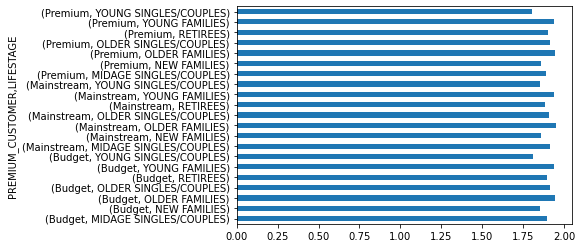

In [296]:
new_chip_tc.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["PROD_QTY"].mean().plot.barh()

In [299]:
new_chip_tc.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"])["TOT_SALES"].mean()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    7.108442
                  NEW FAMILIES              7.297256
                  OLDER FAMILIES            7.291241
                  OLDER SINGLES/COUPLES     7.444305
                  RETIREES                  7.445786
                  YOUNG FAMILIES            7.302705
                  YOUNG SINGLES/COUPLES     6.663023
Mainstream        MIDAGE SINGLES/COUPLES    7.637156
                  NEW FAMILIES              7.313364
                  OLDER FAMILIES            7.281440
                  OLDER SINGLES/COUPLES     7.306049
                  RETIREES                  7.269352
                  YOUNG FAMILIES            7.226772
                  YOUNG SINGLES/COUPLES     7.551279
Premium           MIDAGE SINGLES/COUPLES    7.152371
                  NEW FAMILIES              7.231720
                  OLDER FAMILIES            7.232779
                  OLDER SINGLES/COUPLES     7.459997
     

<AxesSubplot:xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

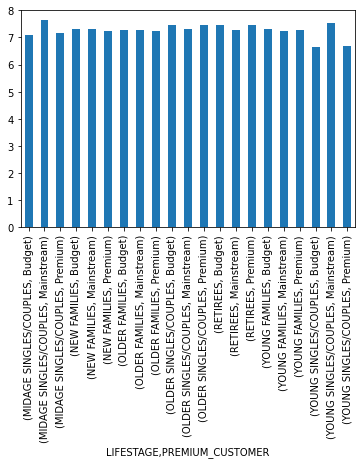

In [303]:
new_chip_tc.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].mean().plot.bar()

<AxesSubplot:xlabel='LIFESTAGE,PREMIUM_CUSTOMER'>

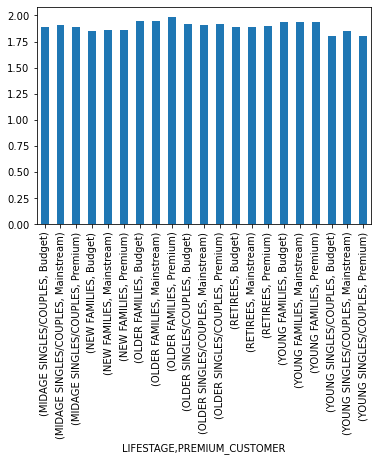

In [146]:
new_chip_tc.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].mean().plot(kind="bar")


<AxesSubplot:xlabel='STORE_NBR'>

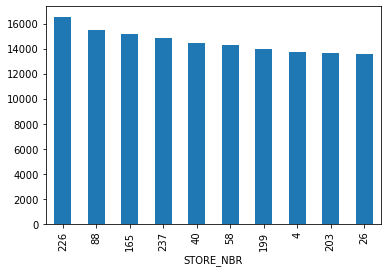

In [218]:
new_chip_tc.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=False).head(10).plot(kind="bar")

Working with YOUNG and MIDAGE SINGLES/COUPLES

In [307]:
young_midage_sc = new_chip_tc[(new_chip_tc["LIFESTAGE"]=="YOUNG SINGLES/COUPLES") | (new_chip_tc["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES") ]

In [308]:
young_midage_sc

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,price,SIZE(g),BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2019,10,3.0,175.0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2019,9,2.7,150.0,Red
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2019-12-30,1,6,86,Cheetos Puffs 165g,1,2.8,2019,12,2.8,165.0,Cheetos
6,1007,YOUNG SINGLES/COUPLES,Budget,2019-12-06,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,2019,12,3.8,110.0,Infuzions
7,1007,YOUNG SINGLES/COUPLES,Budget,2019-12-07,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,2019,12,2.7,150.0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264819,2330311,YOUNG SINGLES/COUPLES,Budget,2019-11-11,77,236755,90,Tostitos Smoked Chipotle 175g,1,4.4,2019,11,4.4,175.0,Tostitos
264820,2330321,YOUNG SINGLES/COUPLES,Mainstream,2019-08-01,77,236756,71,Twisties Cheese Burger 250g,2,8.6,2019,8,4.3,250.0,Twisties
264826,2370181,YOUNG SINGLES/COUPLES,Mainstream,2019-08-04,88,240146,36,Kettle Chilli 175g,2,10.8,2019,8,5.4,175.0,Kettle
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2019-08-05,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,2019,8,6.5,380.0,Dorito


In [275]:
new_chip_tc.to_csv("C:\\Users\\Admin\\Documents\\Projects\\Quatium.csv")